### Stock Market Performance and Public Sentiment

##### CKME 136 Capstone Project

In [19]:
import pandas as pd
import os as os
import seaborn as sns

### Import files 

In [3]:
os.chdir('C:\\Users\\wrigh\\Downloads')

In [49]:
newsdf = pd.read_csv('news_headlines.csv')
stockdf = pd.read_csv('Stock_Data.csv')

In [5]:
newsdf.head()

,title,publication,author,date,year,month,content
0,How Nirvana’s ’Smells Like Teen Spirit’ Became...,NPR,Guy Raz,2000-05-15,2000.0,5.0,"In the early 1990s, Seattle stood at the cente..."
1,David Bowie On The Ziggy Stardust Years: ’We W...,NPR,NPR Staff,2003-09-19,2003.0,9.0,It’s been more than 40 years since David Bowie...
2,Liberals’N’Lawsuits,National Review,Neil Gorsuch,2005-02-07,2005.0,2.0,"Editor’s Note: This article, originally publis..."
3,Always Go To The Funeral,NPR,Deirdre Sullivan,2005-08-08,2005.0,8.0,I believe in always going to the funeral. My f...
4,A Timeline Of Radovan Karadzic,NPR,Corey Flintoff,2008-07-22,2008.0,7.0,Former Bosnian Serb leader Radovan Karadzic wa...


In [6]:
stockdf.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Exchange_Name
0,2015-01-02,17823.070313,17951.779297,17731.300781,17832.990234,17832.990234,76270000,Dow Jones
1,2015-01-02,10859.799805,10889.250000,10770.509766,10830.919922,10830.919922,2708700000,NYSE
2,2015-01-02,14637.299805,14756.299805,14631.400391,14753.700195,14753.700195,132965800,TSX/S&P
3,2015-01-02,4760.240234,4777.009766,4698.109863,4726.810059,4726.810059,1435150000,NASDAQ
4,2015-01-02,2058.899902,2072.360107,2046.040039,2058.199951,2058.199951,2708700000,S&P


### Remove all Years except 2015, 2016, 2017 from News Headlines Dataframe.

In [10]:
subsetnewsdf = newsdf[newsdf['year'].isin(['2015','2016','2017'])]
subsetnewsdf.head()

,title,publication,author,date,year,month,content
106,Hillary Clinton’s point of no return,CNN,Dan Merica,2015-01-01,2015.0,1.0,Washington (CNN) As Democrats close to Hillary...
107,Taylor Swift’s year-end gift video brings all ...,CNN,Lisa Respers France,2015-01-01,2015.0,1.0,"(CNN) Way to make us weep, Taylor Swift. As i..."
108,When is your tweet a threat? (Opinion),CNN,Danny Cevallos,2015-01-02,2015.0,1.0,(CNN) The New York Police Department faced a ...
109,Bono says he’s worried he may never play guita...,CNN,Lisa Respers France,2015-01-02,2015.0,1.0,(CNN) Bono has shared with fans that recovery...
110,"Donna Douglas, ’Beverly Hillbillies’ Elly May,...",CNN,Todd Leopold,2015-01-02,2015.0,1.0,"(CNN) Donna Douglas, who played voluptuous to..."


In [95]:
newsdf = subsetnewsdf
newsdf = newsdf.sort_values('date')
newsdf.head()

,title,publication,author,date,year,month,content
106,Hillary Clinton’s point of no return,CNN,Dan Merica,2015-01-01,2015.0,1.0,Washington (CNN) As Democrats close to Hillary...
107,Taylor Swift’s year-end gift video brings all ...,CNN,Lisa Respers France,2015-01-01,2015.0,1.0,"(CNN) Way to make us weep, Taylor Swift. As i..."
108,When is your tweet a threat? (Opinion),CNN,Danny Cevallos,2015-01-02,2015.0,1.0,(CNN) The New York Police Department faced a ...
109,Bono says he’s worried he may never play guita...,CNN,Lisa Respers France,2015-01-02,2015.0,1.0,(CNN) Bono has shared with fans that recovery...
110,"Donna Douglas, ’Beverly Hillbillies’ Elly May,...",CNN,Todd Leopold,2015-01-02,2015.0,1.0,"(CNN) Donna Douglas, who played voluptuous to..."


In [13]:
newsdf.to_csv('News_Headlines_Clean.csv', index = False)
newsdf = pd.read_csv('News_Headlines_Clean.csv')

### Explore datasets

In [7]:
byyear = newsdf.year.value_counts()
byyear

2016.0    74697
2017.0    47465
2015.0     2422
2014.0       63
2013.0       18
2012.0        8
2011.0        5
2010.0        5
2008.0        2
2005.0        2
2009.0        1
2003.0        1
2000.0        1
Name: year, dtype: int64

In [8]:
bymonth = newsdf.month.value_counts()
bymonth

3.0     14818
4.0     14367
1.0     14345
2.0     13453
5.0     12353
6.0     12272
12.0     7620
11.0     7361
9.0      7112
10.0     7095
8.0      7013
7.0      6881
Name: month, dtype: int64

In [9]:
stockdf.Exchange_Name.value_counts()

S&P          755
Dow Jones    755
NASDAQ       755
NYSE         755
TSX/S&P      752
Name: Exchange_Name, dtype: int64

In [94]:
pubcount = newsdf.publication.value_counts()
pubcount

Breitbart           23777
New York Post       17480
NPR                 11601
Washington Post     11073
Reuters             10705
New York Times       7760
Guardian             7235
CNN                  7003
National Review      6197
Atlantic             6158
Business Insider     4927
Vox                  4925
Buzzfeed News        4629
Fox News             1113
Name: publication, dtype: int64

### Graphic Representation of Data

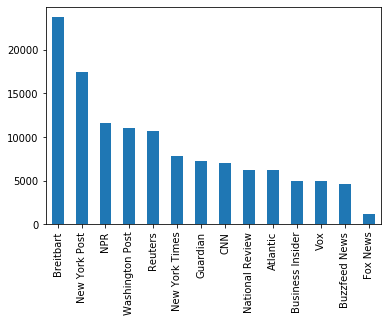

In [35]:
# Number of articles by each publication.
pubcount.plot.bar()

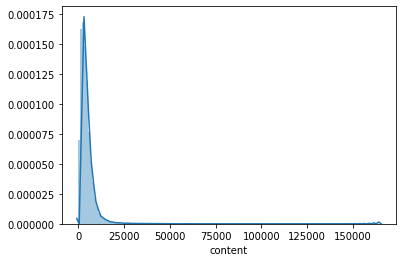

In [68]:
# Length of articles
articlelen = newsdf['content'].str.len()
sns.distplot(articlelen, bins = 150)

In [70]:
articlelen[articlelen > 250000]

67362     164658
67706     162104
69483     152708
113596    162120
Name: content, dtype: int64

In [74]:
newsdf.iloc[99536]

title          Obama warned Trump against hiring Flynn as nat...
publication                                      Washington Post
author                                             Philip Rucker
date                                                  2017-05-08
year                                                        2017
month                                                          5
content                  President Barack Obama personally wa...
Name: 113597, dtype: object

In [67]:
# Drop value, it is too large, not conisdered a news article as it is a transcript from a deposition.
newsdf = newsdf.drop(newsdf.index[99536], axis = 0)

Publication by average length of article


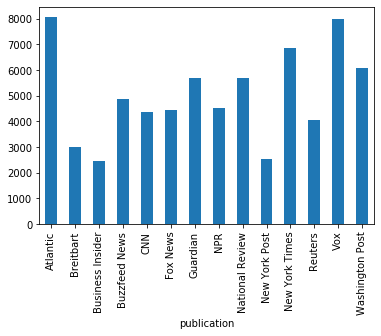

In [93]:
# Publication by Average length of Article
newsdf['article length'] = pd.DataFrame(articlelen)
lengthbypub = newsdf.groupby(['publication'])['article length'].mean()
print('Publication by average length of article')
lengthbypub.plot.bar()

In [ ]:
# Move to pt.2